## 주성분 분석
* 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA 모델을 만들어 보기
### 차원
* 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈, 머신러닝에서는 이런 특성을 차원이라고 부름
* 10,000개의 특성은 결국 10,000개의 차원이라는 건데 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있음
### 차원 축소
* 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합 됨
* 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법
* 또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄여 성능을 향상 시킬 수 있음

## 주성분 분석(PCA)
* 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있음
* 분산은 데이터가 널리 퍼져있는 정도를 말함
* 분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있음
* 분산이 큰 방향인 벡터를 주성분이라고 부름(원본 데이터에 있는 방향)
* 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수(차원)과 같음

In [8]:
## 이전 챕터 함수 불러오기
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) ## n은 샘플 개수 
    rows = int(np.ceil(n/10)) ## 한 줄에 10개씩 이미지를 그림
    cols = n if rows < 2 else 10 ## 행이 1개이면 열의 개
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: ## n개 까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [9]:
import numpy as np
fruits = np.load('data/fruits_300.npy') ## 넘파이에서 npy 파일 로드
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

(300, 10000)


In [10]:
## n_components로 주성분의 개수를 지정해야 함
## 50개의 주성분 찾기
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


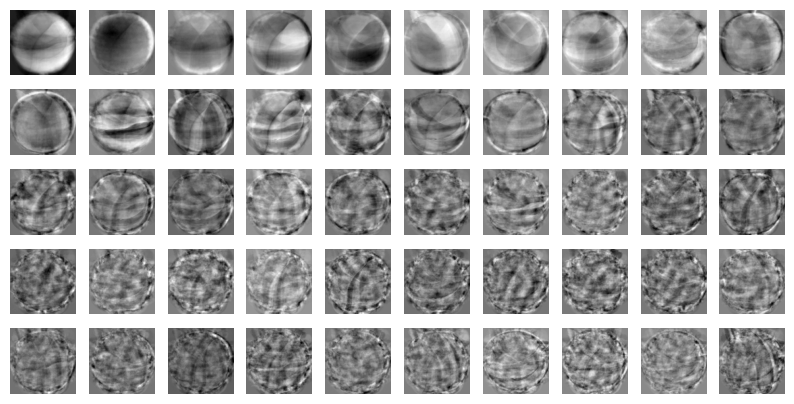

In [11]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [13]:
## 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄이기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


### 원본 데이터 재구성

In [14]:
## PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공
## 다시 10000개로 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


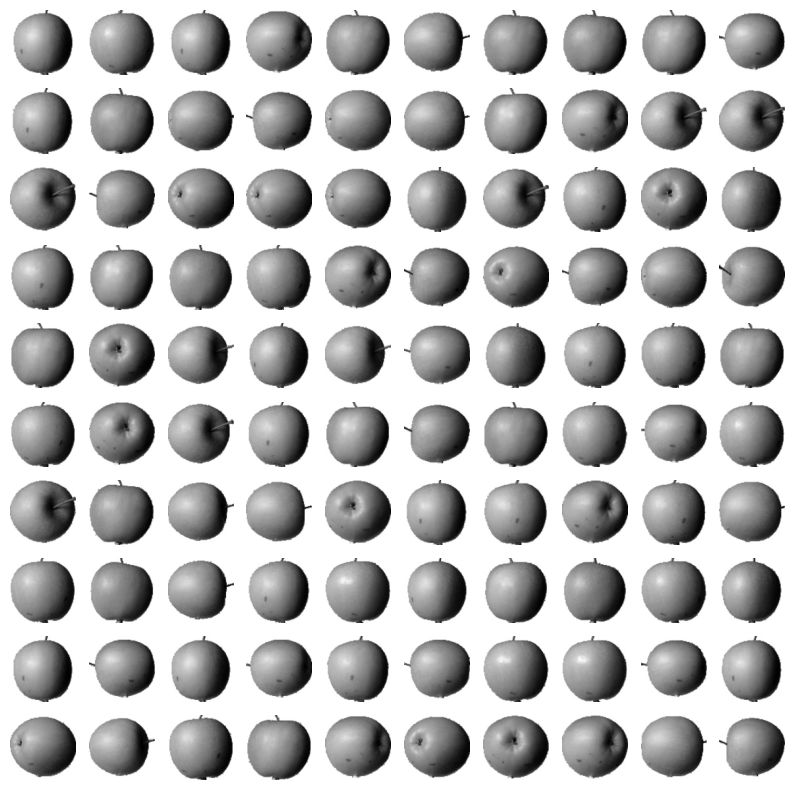

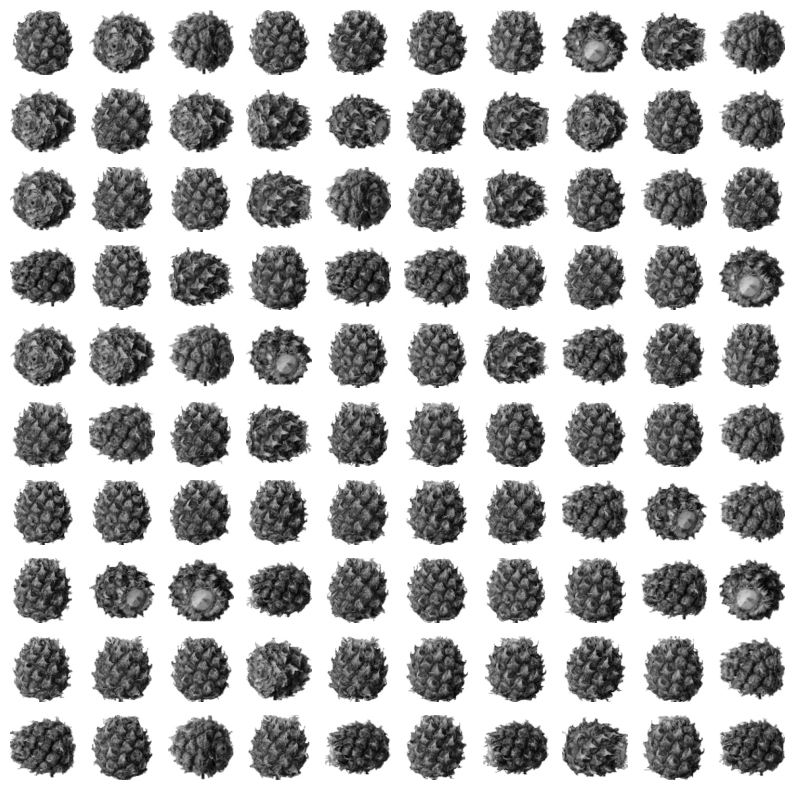

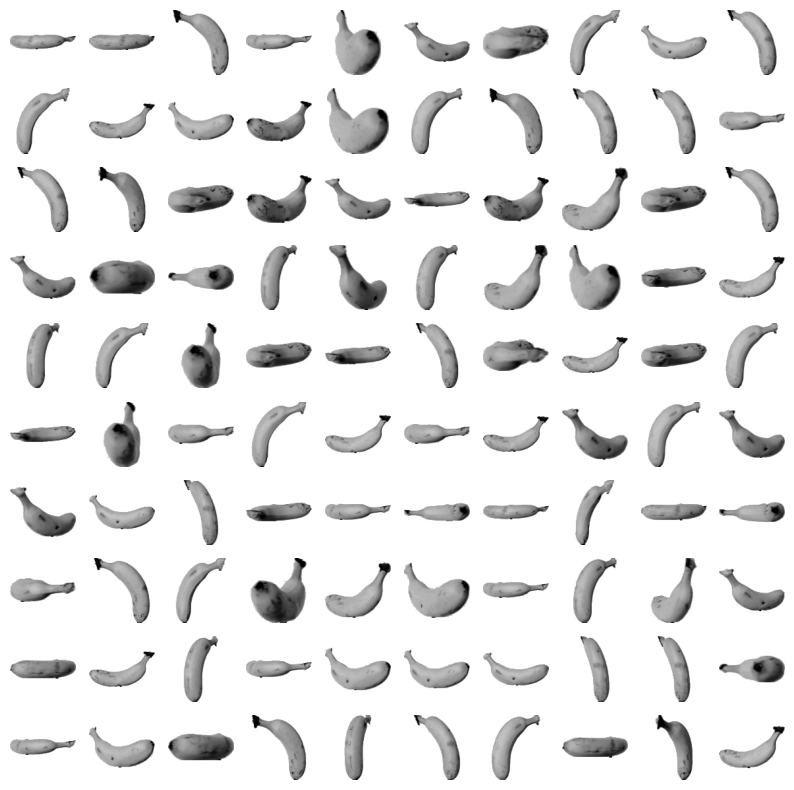

In [15]:
## 정상적으로 복원됨
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits[start:start+100])
    print('\n')

### 설명된 분산
* 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 함
* PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록
* 당연히 첫 번째 주성분의 분산이 가장 큼
* 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음


In [16]:
## 92%가 넘는 분산 유지
print(np.sum(pca.explained_variance_ratio_))

0.921549561316111


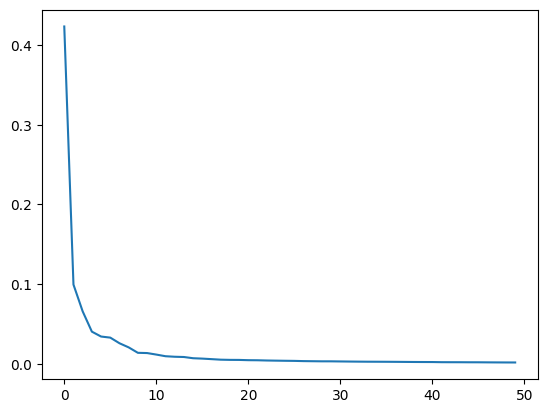

In [17]:
## 분산 시각화
## 처음 10개의 주성분이 대부분의 분산을 표현
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 다른 알고리즘과 함께 사용하기


In [18]:
## 3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [19]:
## 100개 0,1,2 총 300개
target = np.array([0]*100 + [1]*100 + [2]*100)

In [20]:
## 교차 검증의 점수는 0.997정도로 매우 높음
## 검정 폴드의 훈련시간도 기록됨
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


0.9966666666666667
0.4609704494476318


In [21]:
## 차원 축소했을 때와 비교
## 특성 50개만 사용해도 정확도가 비슷하고, 시간이 20배 이상 감소
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.0026053905487060545


In [22]:
## 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 생성
## 2개 발견 
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [23]:
## 차원 2개로 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [24]:
## 2개의 특성을 사용한 모델의 성능 확인
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [25]:
## 2개의 특성을 사용해도 99%의 정확도가 나옴
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.005976676940917969


/Users/kds/anaconda3/envs/kds/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
## 차원 축소된 데이터를 사용해 k-평균 알고리즘 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


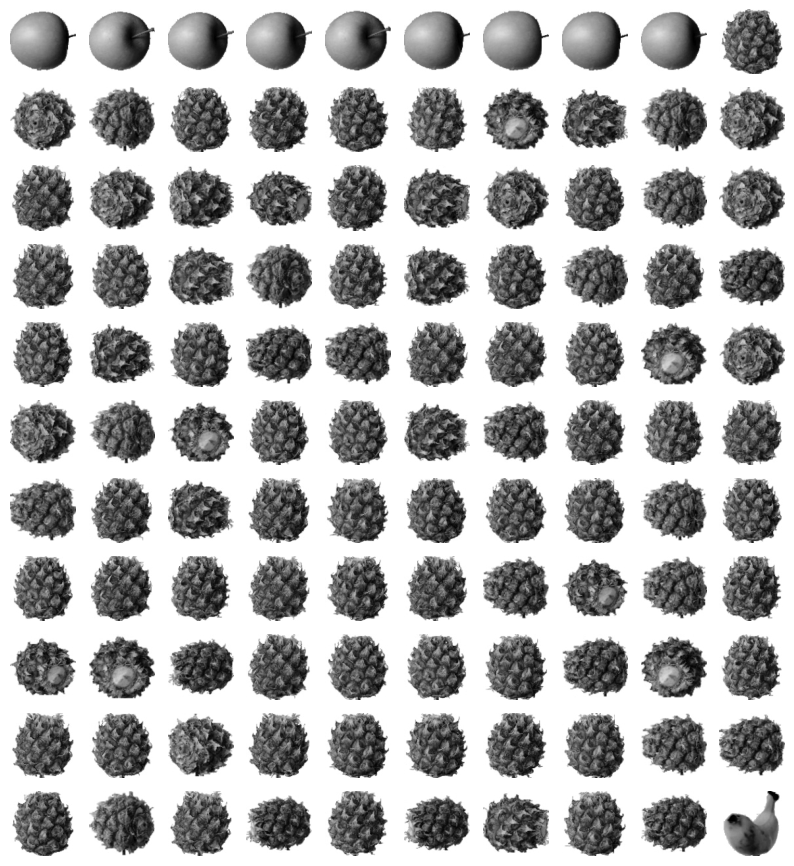

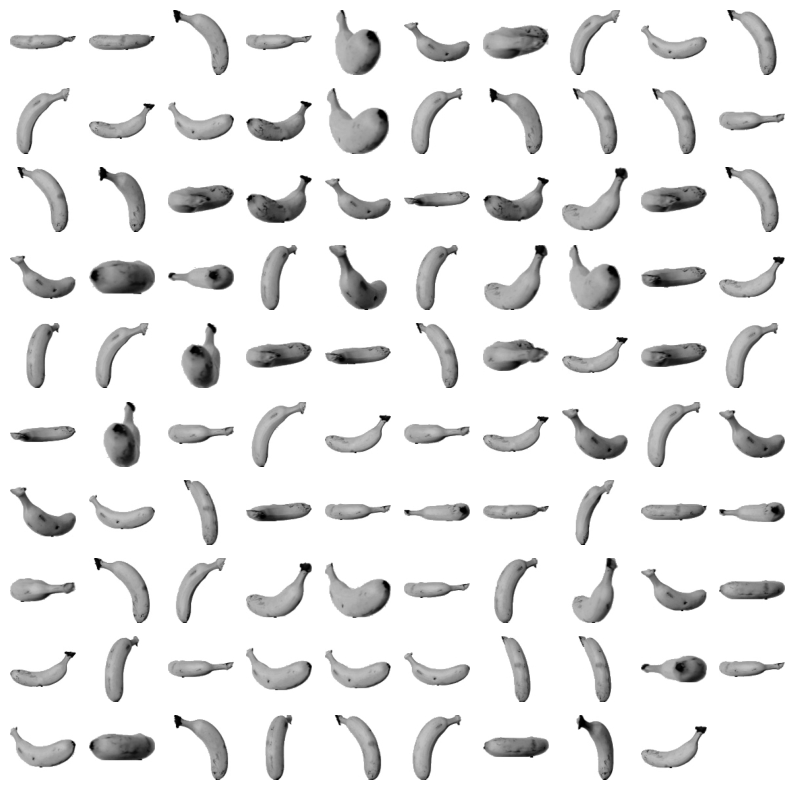

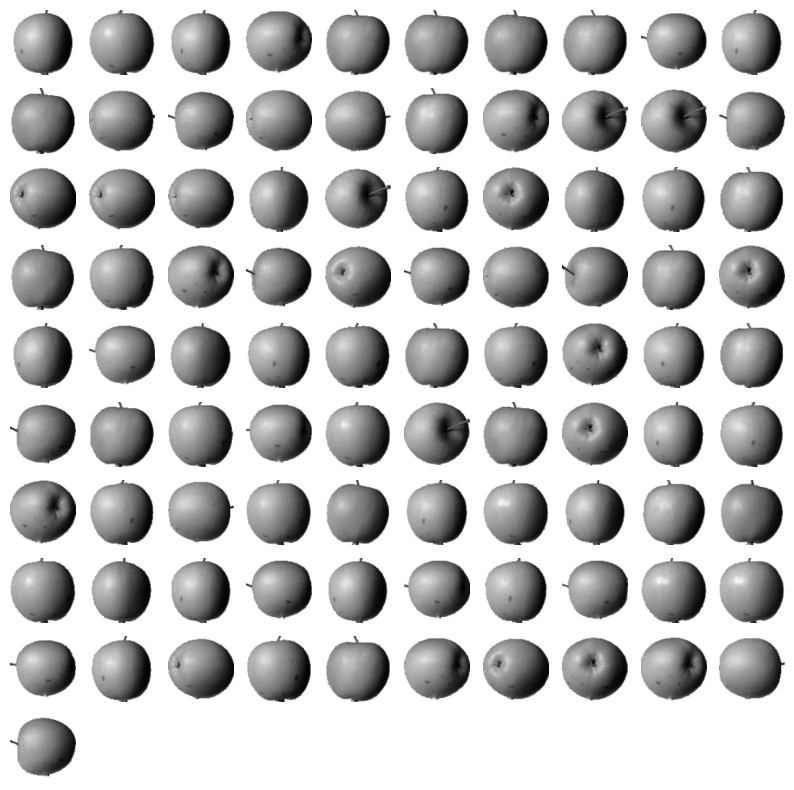

In [27]:
## 시각화
## 2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼동되는 면이 있음
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

In [ ]:
## 훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화
## 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움
## fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있음

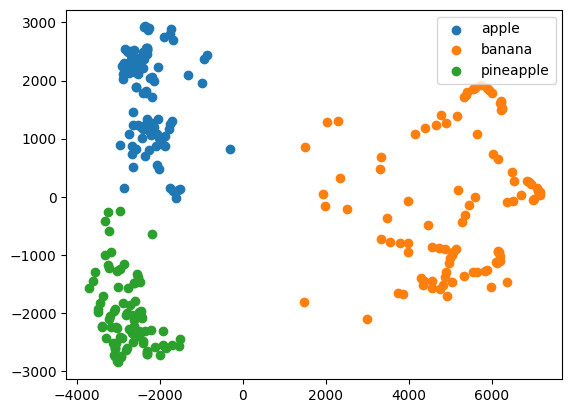

In [28]:
## 시각화(잘 분류가 되었음)
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

## 퀴즈
#### 1번
주성분 분석을 사용하는 이유는 무엇일까요?
#### 2번
1000개의 데이터와 2000개의 피쳐가 있을 때 차원의 개수는 몇개일까요?
#### 3번
주성분이 무엇일까요?
#### 4번
왜 분산이 큰 방향으로 차원축소 할까요?